In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import glob
import numpy.ma as ma
from matplotlib import gridspec

from scipy.interpolate import griddata

import gsw as sw
from mpl_toolkits.basemap import Basemap, cm, interp

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

/Users/archie/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# import mitrate data

argo = pd.read_csv('../data/argo/7546KUROSHIOQC.txt', sep = ',')
argo2 = pd.read_csv('../data/argo/7674KUROSHIOQC.txt', sep = ',')

#argo = argo.append(argo2,ignore_index=True)

month = []
for n in range(len(argo)):
    month.append(np.int(str(argo['Date/GMT'][n]).split('/')[0].lstrip('0   ')))

argo['MONTH'] = month
argo.loc[argo['NITRATE[UMOL/KG]']<0, 'NITRATE[UMOL/KG]'] = 0

mld = []
for d in pd.unique(argo['Days since 1/1/1900']):
    tmp = argo[argo['Days since 1/1/1900']==d].reset_index()
    if len(tmp)>3:
        zz = np.argmin(tmp['SIGMA_THETA[KG/M^3]']-(tmp['SIGMA_THETA[KG/M^3]'][3]+0.03))
        mld.append(tmp['DEPTH[M]'][zz])  
    else:
        mld.append(np.nan)
               

month = []
for n in range(len(argo2)):
    month.append(np.int(str(argo2['Date/GMT'][n]).split('/')[0].lstrip('0   ')))

argo2['MONTH'] = month
argo2.loc[argo2['NITRATE[UMOL/KG]']<0, 'NITRATE[UMOL/KG]'] = 0

mld2 = []
for d in pd.unique(argo2['Days since 1/1/1900']):
    tmp = argo2[argo2['Days since 1/1/1900']==d].reset_index()
    if len(tmp)>3:
        zz = np.argmin(tmp['SIGMA_THETA[KG/M^3]']-(tmp['SIGMA_THETA[KG/M^3]'][3]+0.03))
        mld2.append(tmp['DEPTH[M]'][zz])  
    else:
        mld2.append(np.nan)
        
print len(mld2)

# argo = argo[(argo['LON']>130) & (argo['LON']<170) & (argo['LAT']>25) & (argo['LAT']<45)]
print argo.columns


270
Index([u'Date/GMT', u'Days since 1/1/1900', u'NITRATE[UMOL/KG]', u'DEPTH[M]',
       u'PRESSURE[DBAR]', u'MON/DAY/YR', u'SALINITY[PSS]', u'TEMPERATURE[C]',
       u'SIGMA_THETA[KG/M^3]', u'OXYGEN[UMOL/KG]', u'OXYGENSAT[%]', u'LON',
       u'LAT', u'MONTH'],
      dtype='object')


In [3]:
d

42736.535999999993

/Users/archie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


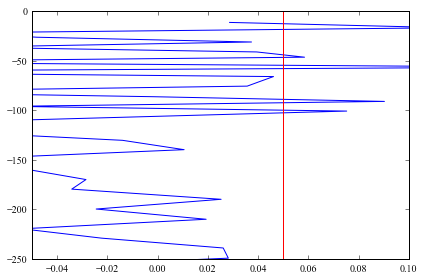

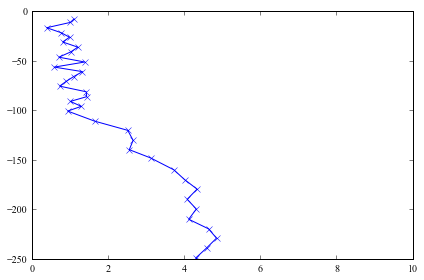

In [4]:
days = pd.unique(argo['Days since 1/1/1900'])


sub = argo[argo['Days since 1/1/1900']==days[190]]

plt.plot(np.append(np.diff(sub['NITRATE[UMOL/KG]']),0)/np.append(np.diff(sub['DEPTH[M]']),0),sub['DEPTH[M]'])
plt.axvline(0.05, color='red')
#plt.axvline(0.01, color='red')

plt.axis([-0.05, 0.1, -250, 0])
plt.show()

plt.plot(sub['NITRATE[UMOL/KG]'],sub['DEPTH[M]'],'-x')
plt.axis([0.0, 10, -250, 0])
plt.show()

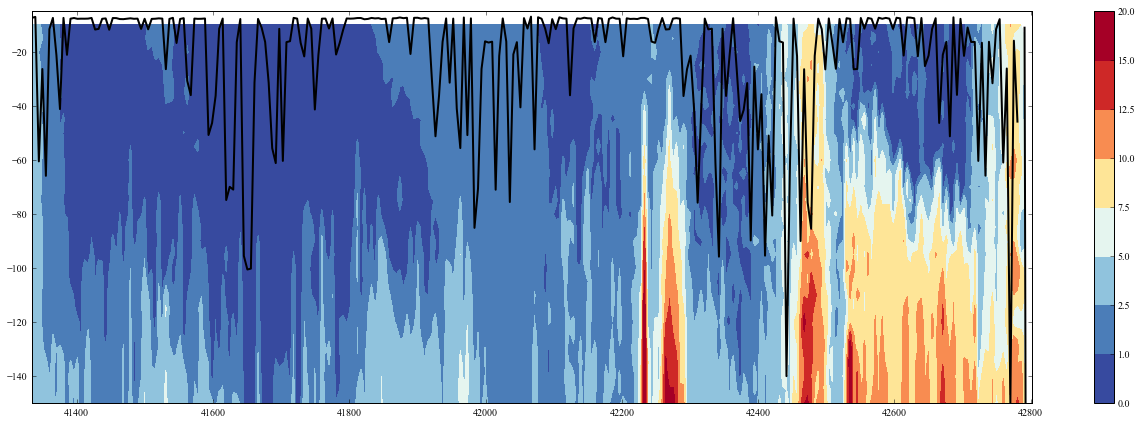

In [5]:
# bin the nitrate data into date vs. depth bins

dz = 5

zbin = np.arange(-150., -5., dz)
xbin = days

xgrid, zgrid = np.meshgrid(xbin, zbin, sparse=False, indexing='ij')
points = argo[['Days since 1/1/1900', 'DEPTH[M]']].values
data = argo['NITRATE[UMOL/KG]'].values
grid_nit = griddata(points, data, (xgrid, zgrid), method='cubic')
grid_nit[grid_nit<0] = 0

fig1 = plt.figure(1, figsize=(18,6))

levels = [0., 1., 2.5, 5., 7.5, 10., 12.5, 15., 20.]

plt.contourf(xgrid, zgrid, grid_nit, levels, vmin=0, vmax = 15, cmap = plt.get_cmap('RdYlBu_r'))
plt.plot(days, mld, 'k', lw = 2)
plt.axis([np.min(days), np.max(days), -150, -5])
plt.colorbar()
plt.show()

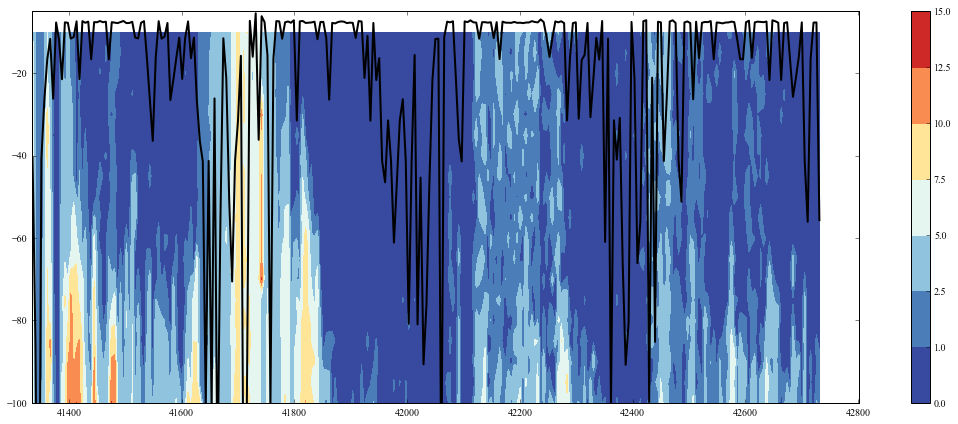

In [6]:
# bin the nitrate data into date vs. depth bins
days2 = pd.unique(argo2['Days since 1/1/1900'])

dz = 5

zbin = np.arange(-100., -5., dz)
xbin = days2

xgrid, zgrid = np.meshgrid(xbin, zbin, sparse=False, indexing='ij')
points = argo2[['Days since 1/1/1900', 'DEPTH[M]']].values
data = argo2['NITRATE[UMOL/KG]'].values
grid_nit = griddata(points, data, (xgrid, zgrid), method='cubic')
grid_nit[grid_nit<0] = 0

fig1 = plt.figure(1, figsize=(15,6))

levels = [0., 1., 2.5, 5., 7.5, 10., 12.5, 15.]

plt.contourf(xgrid, zgrid, grid_nit, levels, vmin=0, vmax = 15, cmap = plt.get_cmap('RdYlBu_r'))
plt.plot(days2, mld2, 'k', lw = 2)
plt.axis([np.min(days), np.max(days), -100, -5])

plt.colorbar()
plt.show()

In [7]:
len(pd.unique(argo2['Days since 1/1/1900']))

270

In [8]:
argo['SIGMA_THETA[KG/M^3]


SyntaxError: EOL while scanning string literal (<ipython-input-8-d44a06bcf6a6>, line 1)